In [1]:
from lib.my_functions import load_npy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_runs     =[10,22,26]     
N_channels =[0,1,4,6]       
Pl         =[-1,-1,-1,-1]   #polarity
P_channels ={}
for ch,pl in zip(N_channels,Pl): P_channels[ch]=pl

L_channels  =["SiPM1","SiPM2","PMT","SuperCell"]
RUNS=load_npy(N_runs, N_channels,P_channels)

#Customizable
PROP={}
PROP["sampling"]=4; #ns
PROP["NBins_Ped"]=250

RUNS.keys()

dict_keys(['N_runs', 'N_channels', 'P_channels', 10, 22, 26])

In [3]:
#compute Pedestals:
from lib.my_functions import compute_pedestal_variables

compute_pedestal_variables(RUNS,PROP["NBins_Ped"])
RUNS[10][0].keys()
# for run in N_runs:
#     for ch in N_channels:
#         RUNS[run][ch]["Ped_STD"] =np.std (RUNS[run][ch]["ADC"][:,:PROP["NBins_Ped"]],axis=1)
#         RUNS[run][ch]["Ped_mean"]=np.mean(RUNS[run][ch]["ADC"][:,:PROP["NBins_Ped"]],axis=1)
#         RUNS[run][ch]["Ped_max"] =np.max (RUNS[run][ch]["ADC"][:,:PROP["NBins_Ped"]],axis=1)
#         RUNS[run][ch]["Ped_min"] =np.min (RUNS[run][ch]["ADC"][:,:PROP["NBins_Ped"]],axis=1)


dict_keys(['ADC', 'Sampling', 'EventNumber', 'TriggerTimeStamp', 'PCTimeStamp', 'NBins_wvf', 'Raw_file_keys', 'Ped_STD', 'Ped_mean', 'Ped_max', 'Ped_min'])

In [4]:
from lib.my_functions import compute_peak_variables

compute_peak_variables(RUNS)
RUNS[10][0].keys()

dict_keys(['ADC', 'Sampling', 'EventNumber', 'TriggerTimeStamp', 'PCTimeStamp', 'NBins_wvf', 'Raw_file_keys', 'Ped_STD', 'Ped_mean', 'Ped_max', 'Ped_min', 'Peak_amp', 'Peak_time'])

[]

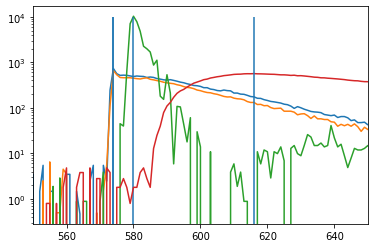

In [5]:
for ch in N_channels:
    plt.plot(P_channels[ch]*(RUNS[10][ch]["ADC"][0]-RUNS[10][ch]["Ped_mean"][0]))
    plt.vlines(RUNS[10][ch]["Peak_time"][0],0,10000)

plt.xlim([550,650])
plt.semilogy()

In [6]:
import copy

def save_proccesed_variables(my_runs,out_path="data/Analysis_"):
    """Does exactly what it says, no RawWvfs here"""
    
    #  Remove the unwanted branches in the copy
    aux=copy.deepcopy(RUNS)
    # print(my_runs[10][0].keys())
    # print(aux [10][0].keys())

    for run in aux["N_runs"]:
        for ch in aux["N_channels"]:
            x=0;
            for key in aux[run][ch]["Raw_file_keys"]:
                del aux[run][ch][key]

    # Crosscheck
    print(RUNS[10][0].keys())
    print(aux [10][0].keys())
    
    # Save the info in aux dict
    for run in aux["N_runs"]:
        for ch in aux["N_channels"]:
            aux_path=out_path+"run"+str(run).zfill(2)+"_ch"+str(ch)+".npy"
            np.save(aux_path,aux[run][ch])
            print("Saved data in:" , aux_path)


In [7]:
save_proccesed_variables(RUNS)

dict_keys(['ADC', 'Sampling', 'EventNumber', 'TriggerTimeStamp', 'PCTimeStamp', 'NBins_wvf', 'Raw_file_keys', 'Ped_STD', 'Ped_mean', 'Ped_max', 'Ped_min', 'Peak_amp', 'Peak_time'])
dict_keys(['NBins_wvf', 'Raw_file_keys', 'Ped_STD', 'Ped_mean', 'Ped_max', 'Ped_min', 'Peak_amp', 'Peak_time'])
Saved data in: data/Analysis_run10_ch0.npy
Saved data in: data/Analysis_run10_ch1.npy
Saved data in: data/Analysis_run10_ch4.npy
Saved data in: data/Analysis_run10_ch6.npy
Saved data in: data/Analysis_run22_ch0.npy
Saved data in: data/Analysis_run22_ch1.npy
Saved data in: data/Analysis_run22_ch4.npy
Saved data in: data/Analysis_run22_ch6.npy
Saved data in: data/Analysis_run26_ch0.npy
Saved data in: data/Analysis_run26_ch1.npy
Saved data in: data/Analysis_run26_ch4.npy
Saved data in: data/Analysis_run26_ch6.npy


[]

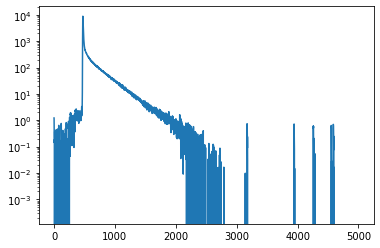

In [17]:
ch=4
wvf1=np.mean((P_channels[ch]*(RUNS[22][ch]["ADC"].T-RUNS[22][ch]["Ped_mean"])).T,axis=0)
plt.plot(wvf1)
plt.semilogy()

In [9]:
# np.mean(RUNS[10][ch]["ADC"],axis=0)
# a
# for wv in RUNS[10][ch]["ADC"]:
#     plt.plot(wv)